In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
from sklearn import datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv
Saving dtypes.csv to dtypes (1).csv


# Chargé et nétoyé les données






In [ ]:
df_type = pd.read_csv('dtypes.csv', sep='~')
variable_types = dict(zip(df_type.column, df_type.type))
df = pd.read_csv('data.csv', sep='~', dtype=variable_types, na_values='I am null')

df_type.head()
df.head()


#df.columns = str(df.columns.lower())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
categorical = [col for col in df.columns if df[col].dtypes == 'object']
numerical = [col for col in df.columns if df[col].dtypes in ('int64',"float64")]

## analyse univariée 

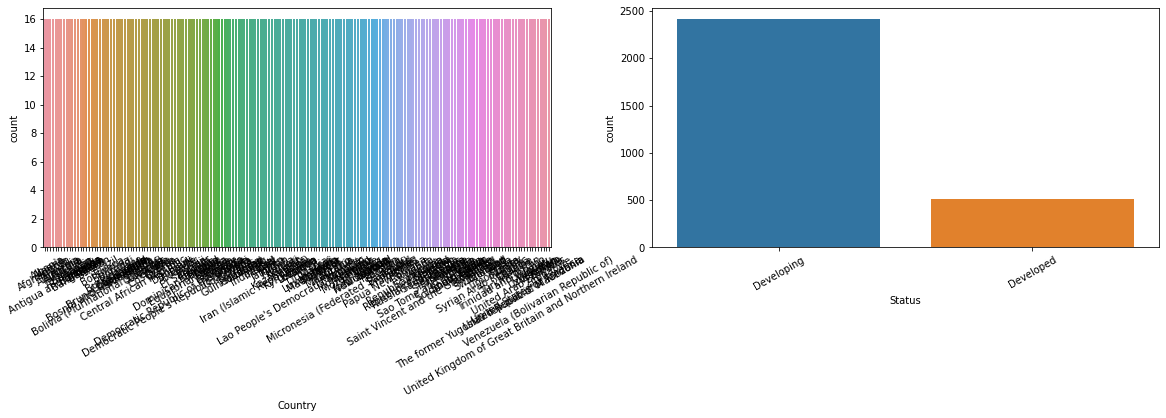

In [ ]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
plt.show()


# a regler

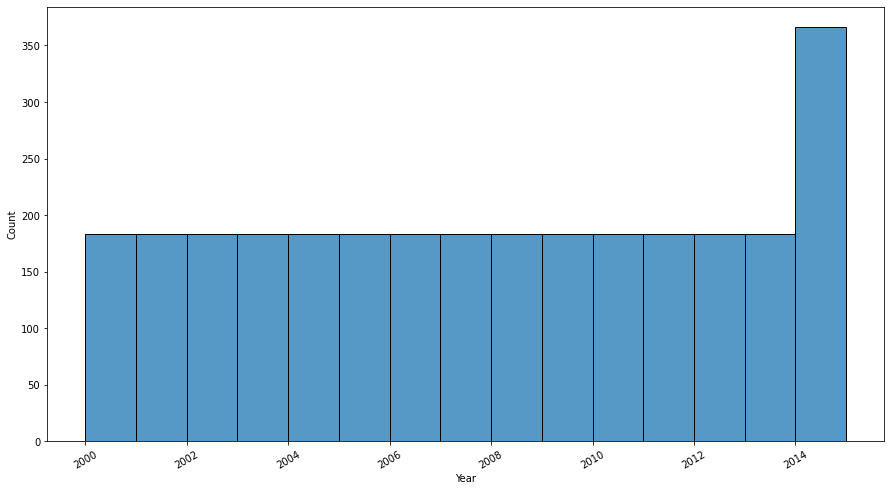

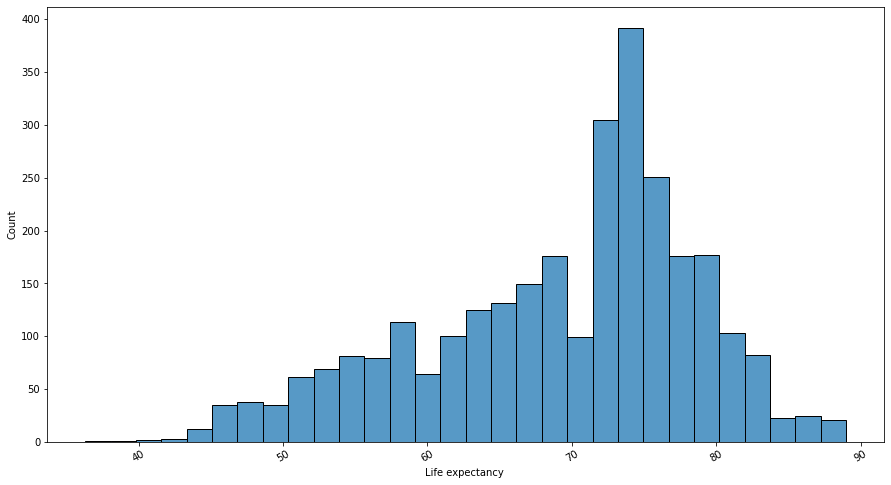

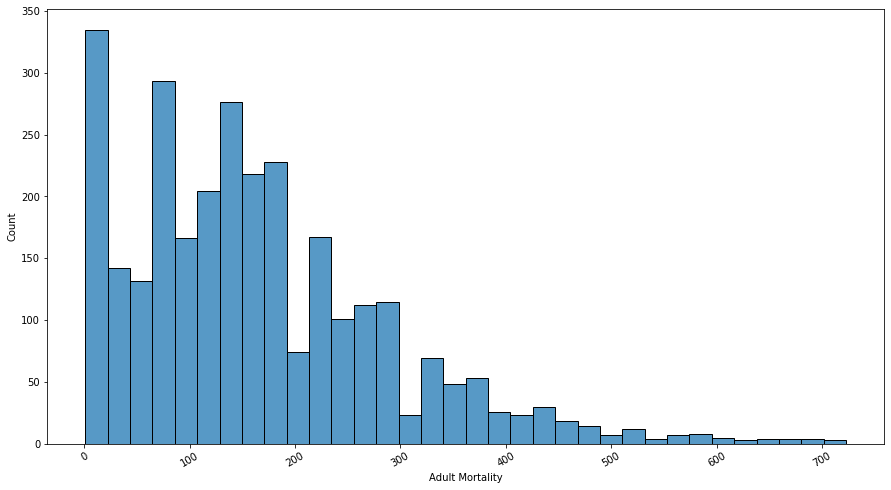

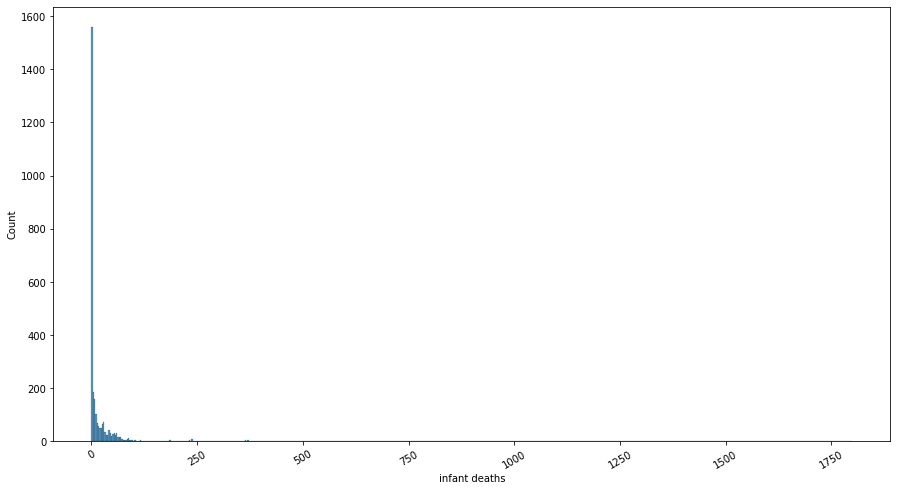

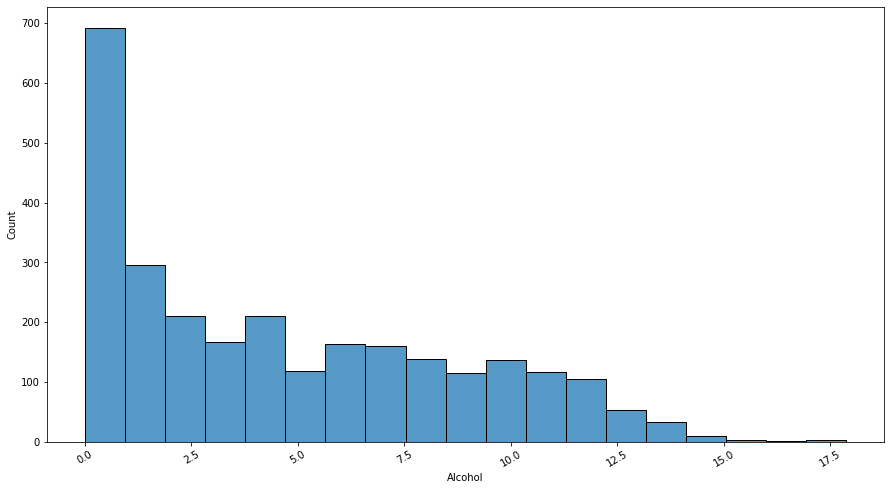

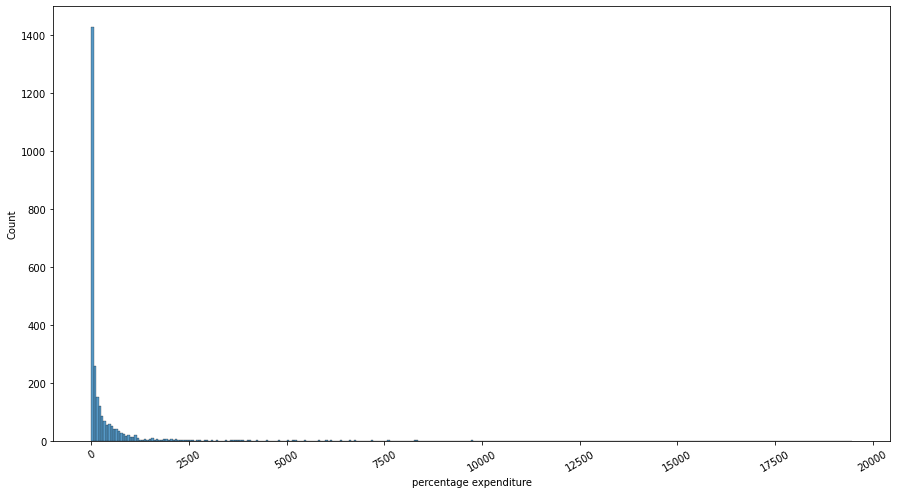

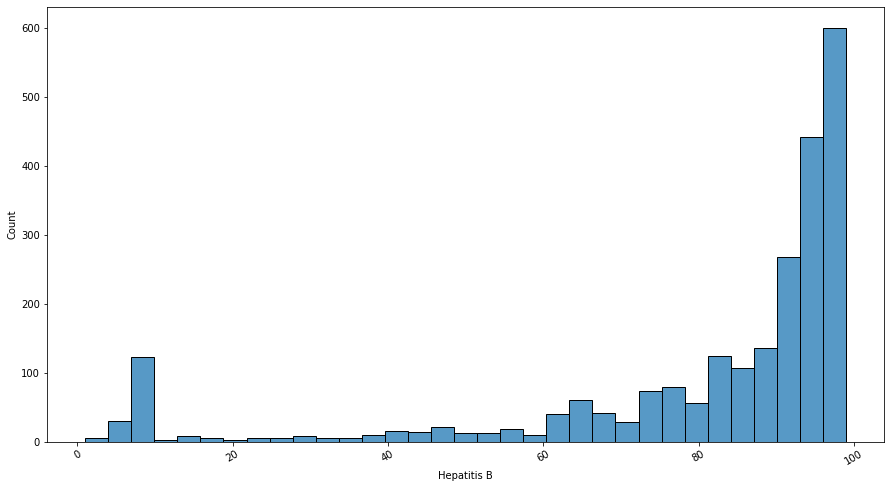

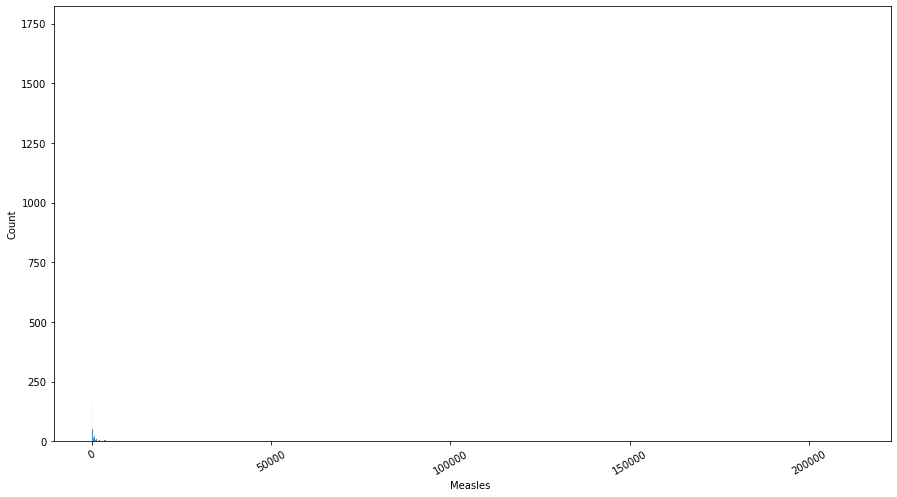

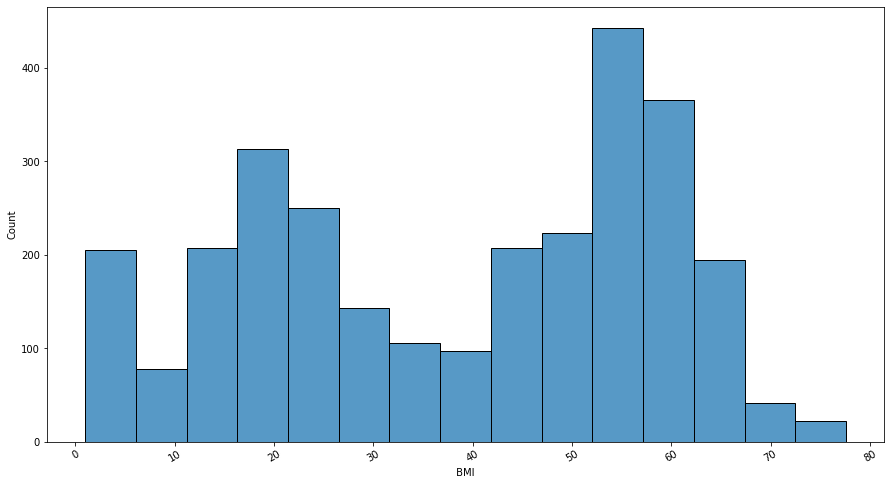

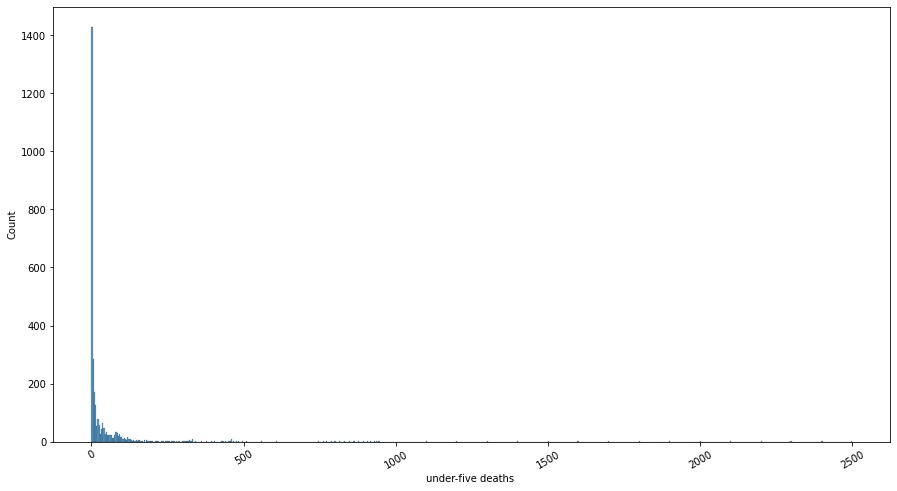

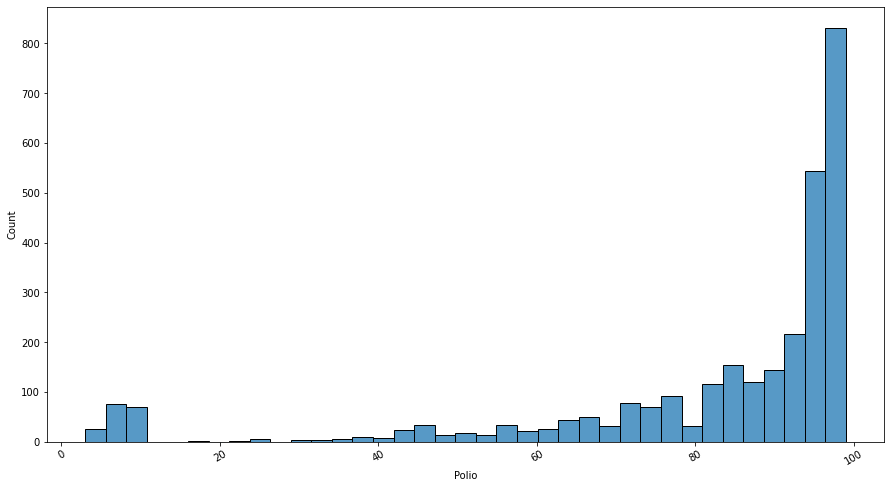

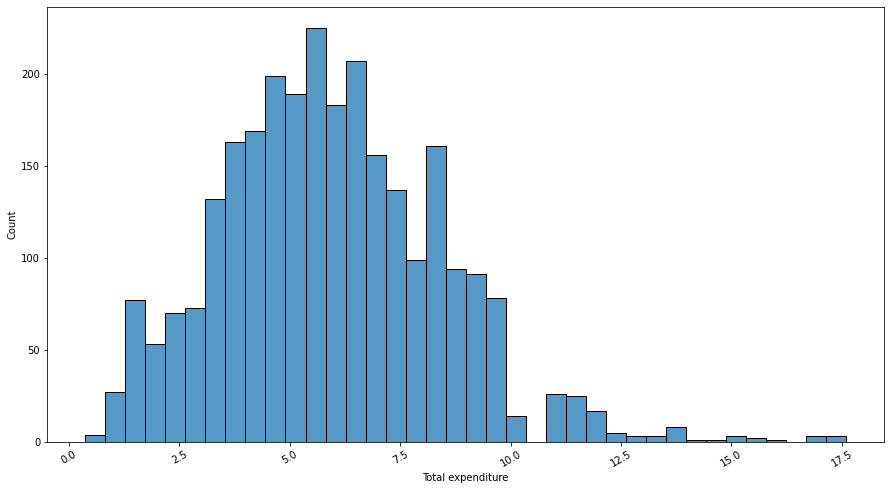

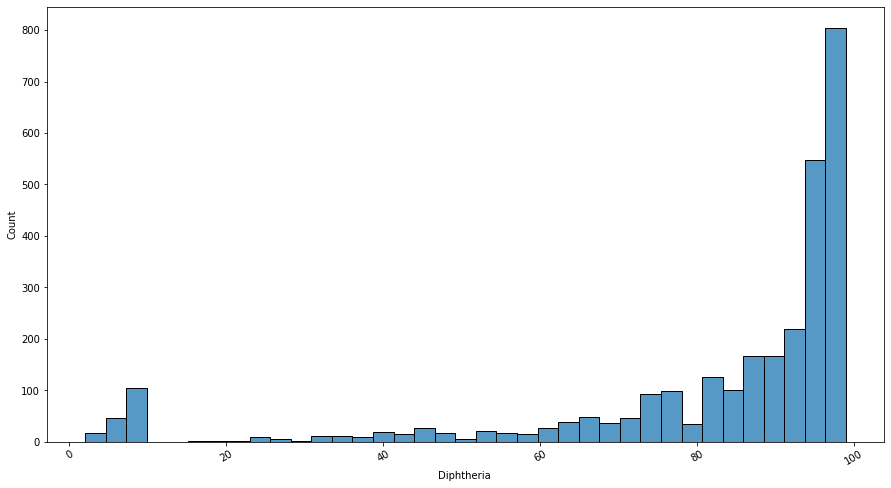

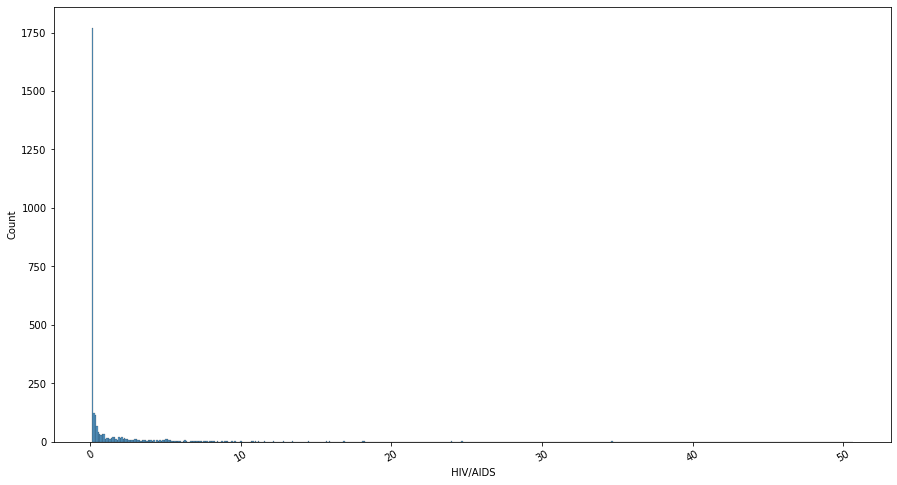

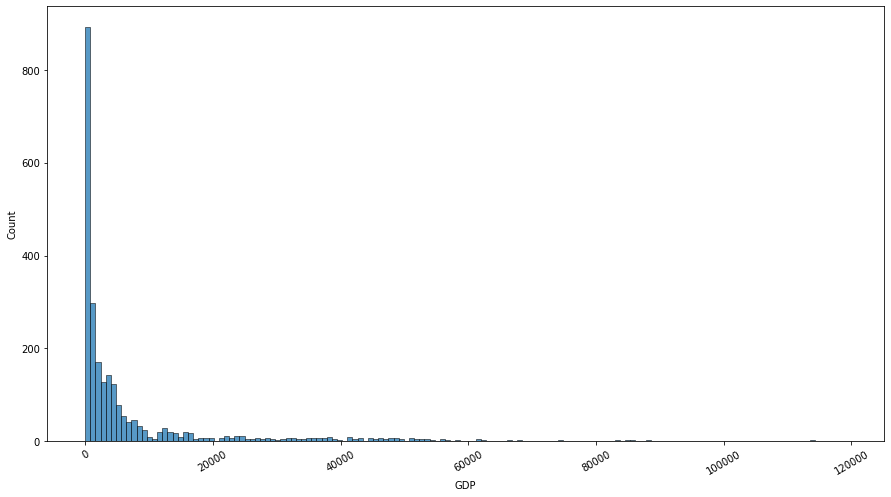

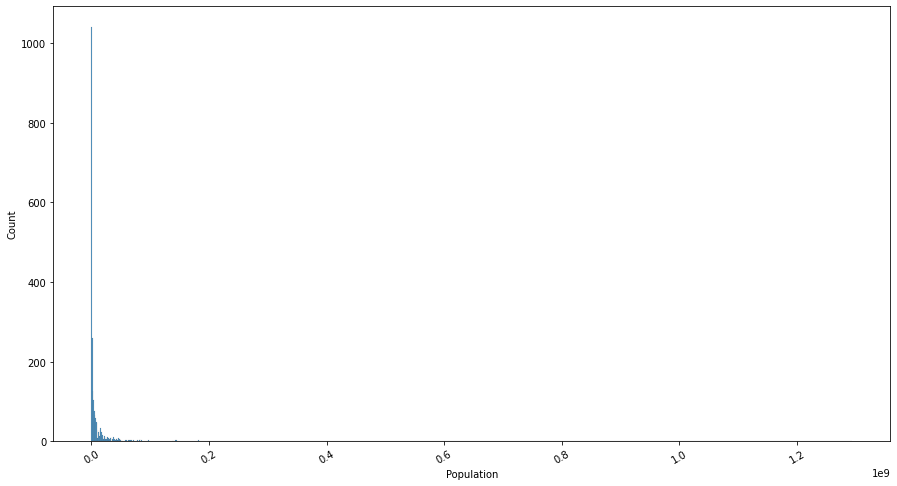

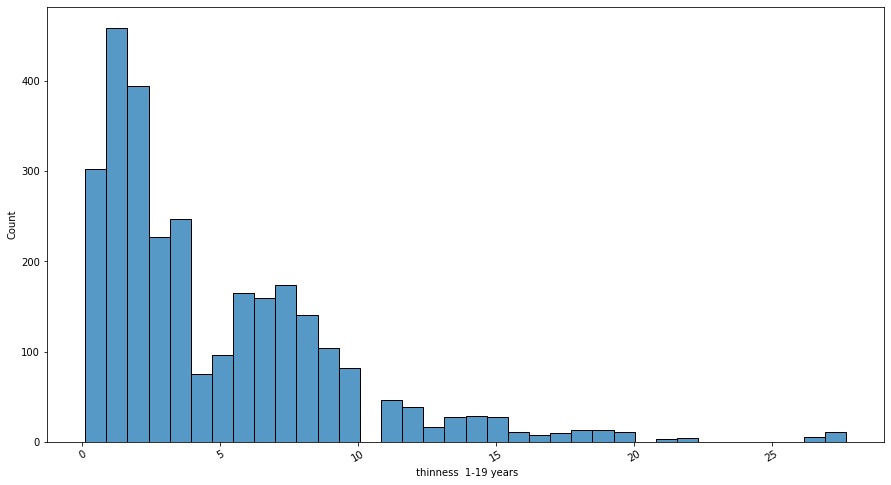

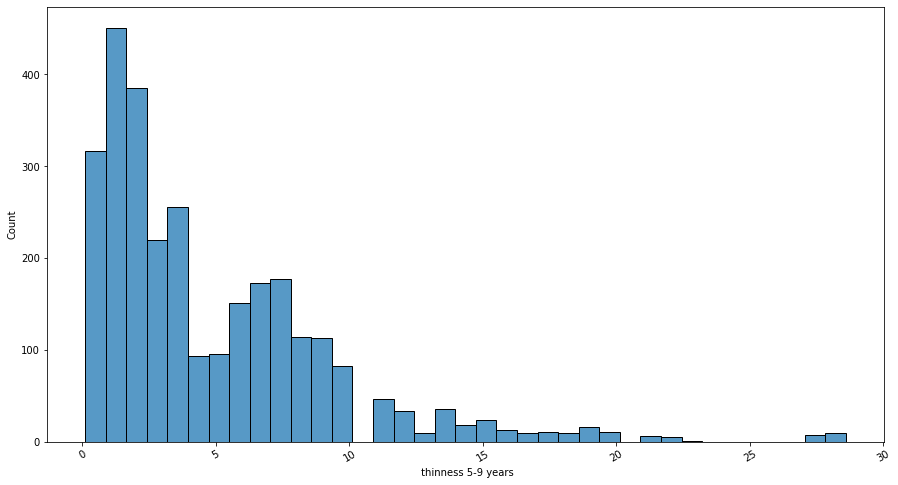

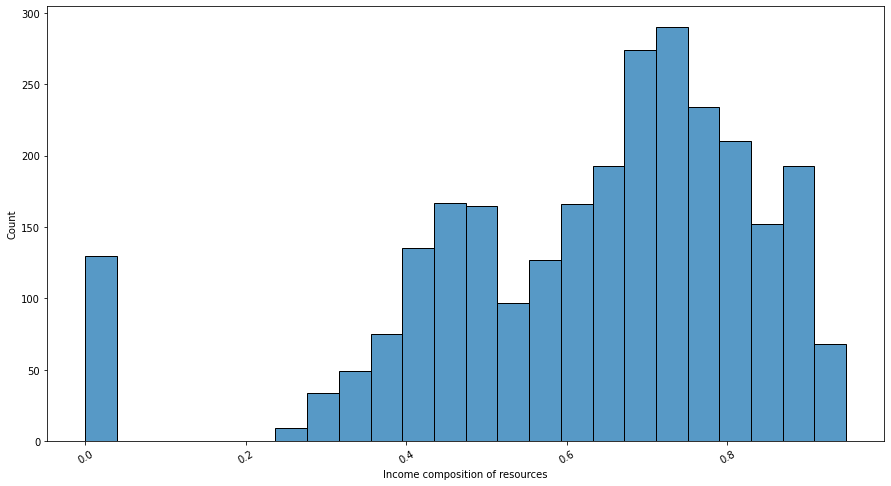

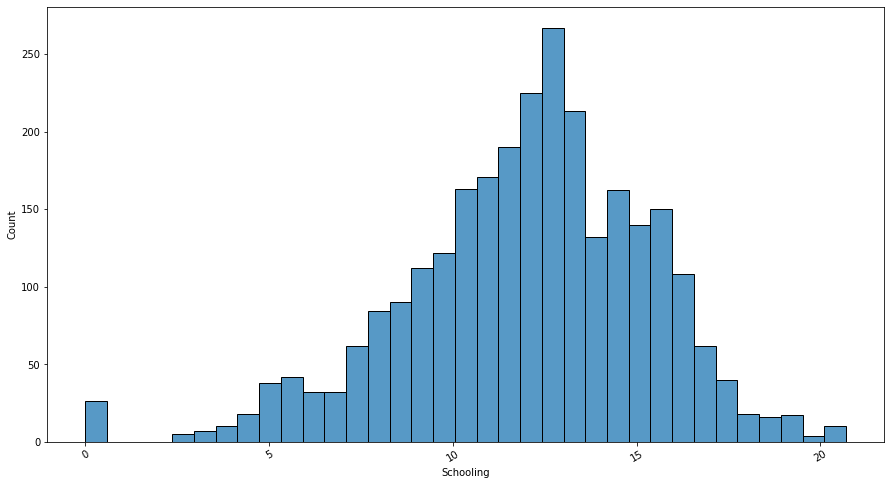

In [ ]:
for cat in numerical:
    fig = plt.figure(figsize = (15,8))
    sns.histplot(data = df, x = cat)
    plt.xticks(rotation=30)
    plt.show()


##  analyse multivariée

Categorial variable


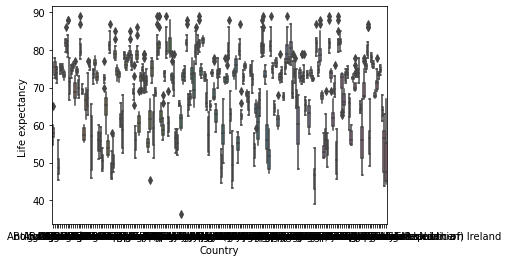

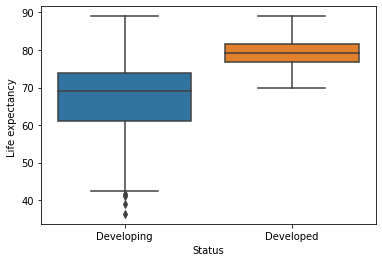

Numerical variable


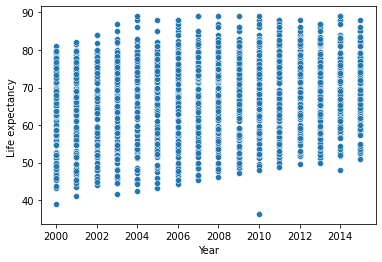

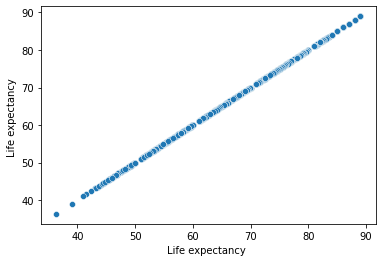

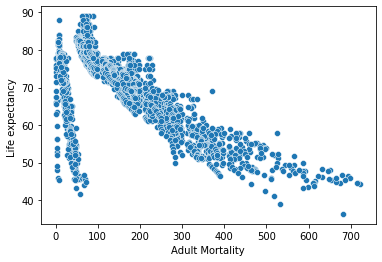

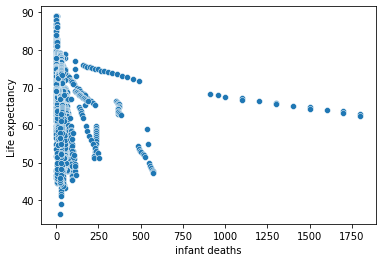

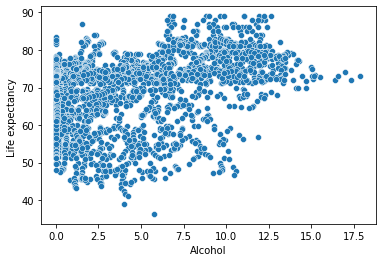

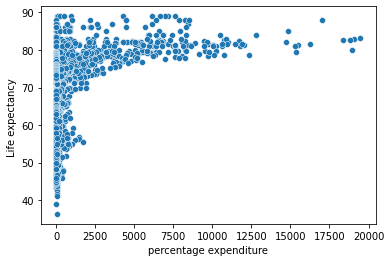

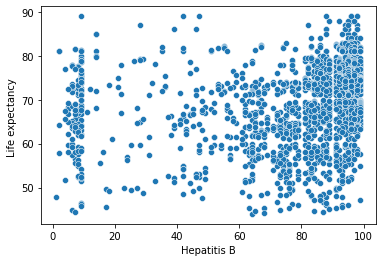

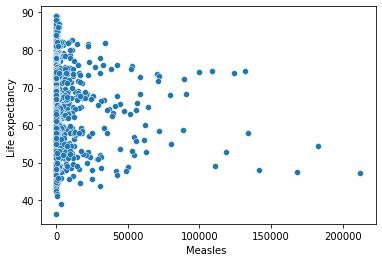

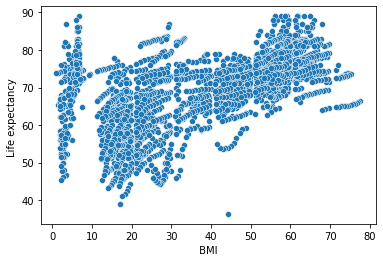

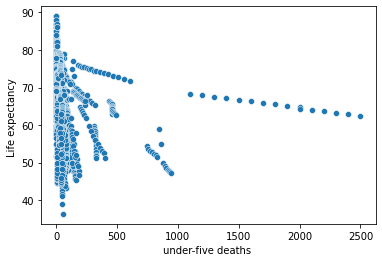

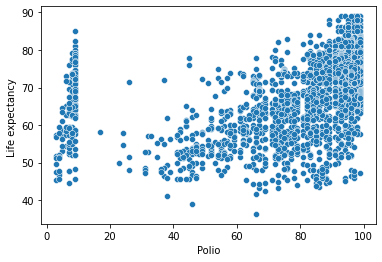

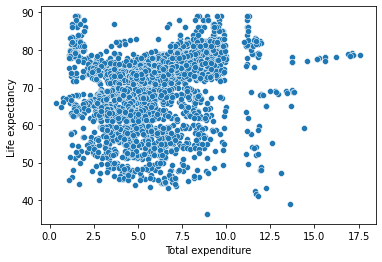

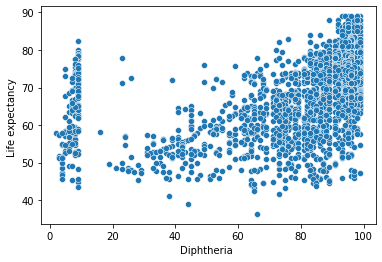

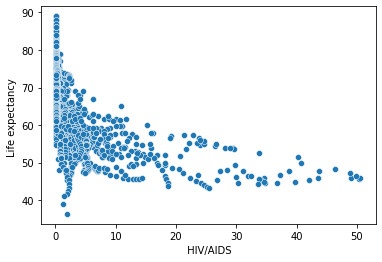

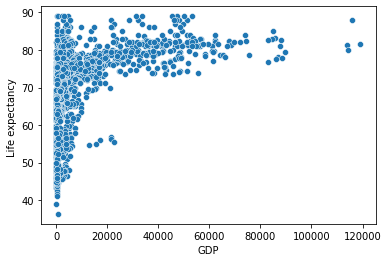

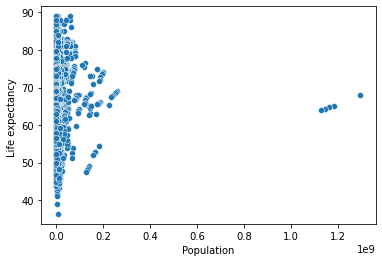

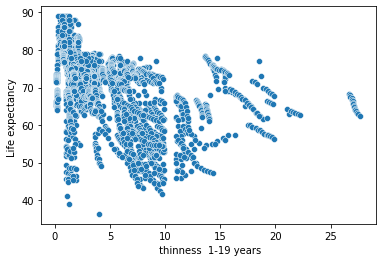

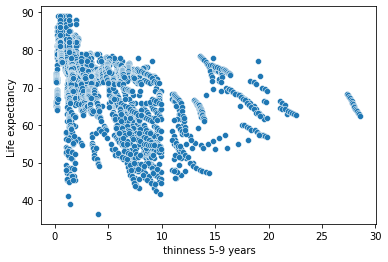

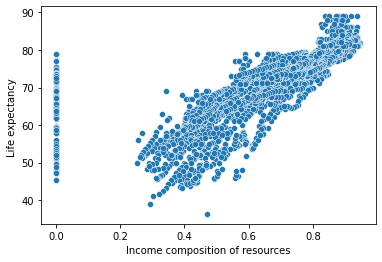

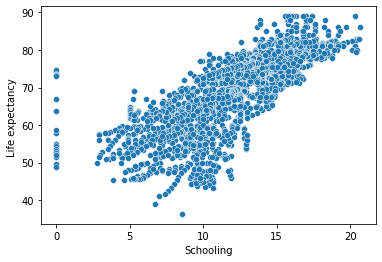

In [ ]:
def Bivariate_vizu_reg(df,target):

    print("Categorial variable")
    for col in categorical:
      sns.boxplot(data = df, x = col, y = target)
      plt.show()

    print("Numerical variable")
    for col in numerical:
      
      sns.scatterplot(data = df, x = col, y = target )
      plt.show()

Bivariate_vizu_reg(df,'Life expectancy ')

## train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size = 0.2, random_state= 0)

print(train.shape, test.shape)

(2342, 22) (586, 22)


# gérer les valeurs manquantes et encodage

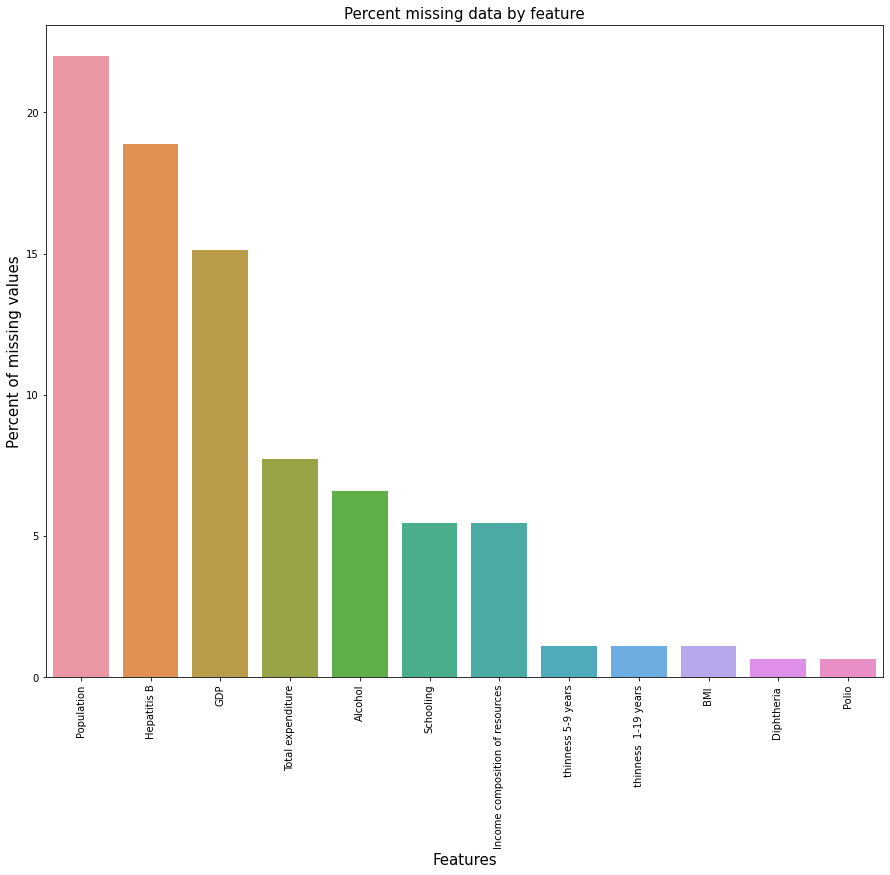

In [ ]:
def missing_values_vizu(df):
    missing_by_col=df.isnull().sum()
    col_with_na=missing_by_col[missing_by_col>0]
    percent_missing=(col_with_na/len(df))*100
    percent_missing=percent_missing.sort_values(ascending=False)
    
    plt.figure(1, figsize=(15, 12))
    sns.barplot(x=percent_missing.index,y=percent_missing)

    plt.xticks(rotation='90')
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)

missing_values_vizu(df)

In [ ]:
def imputeNA(df):
    #columns with missigns values
    cols_with_missings=[col for col in df.columns if df[col].isnull().any()]
    #numericals and categorials columns with missings values
    cols_num_with_missings=[col for col in df.loc[:,cols_with_missings].columns
                        if df[col].dtypes=='float64' or df[col].dtypes=='int64']
    cols_cat_with_missings=[col for col in df.loc[:,cols_with_missings].columns
                        if df[col].dtypes=='object']
    
    cat_subset=df.loc[:,cols_cat_with_missings]
    num_subset=df.loc[:,cols_num_with_missings]
    
    #mode imputationfor categorial columns
    for cat_col in cat_subset.columns:
        df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)
        
    #mean imputaion in the numerical columns
    for col in num_subset.columns:
        df[col].fillna(df[col].mean(),inplace=True)
        
    return df
  
train = imputeNA(train)
test = imputeNA(test)
train.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

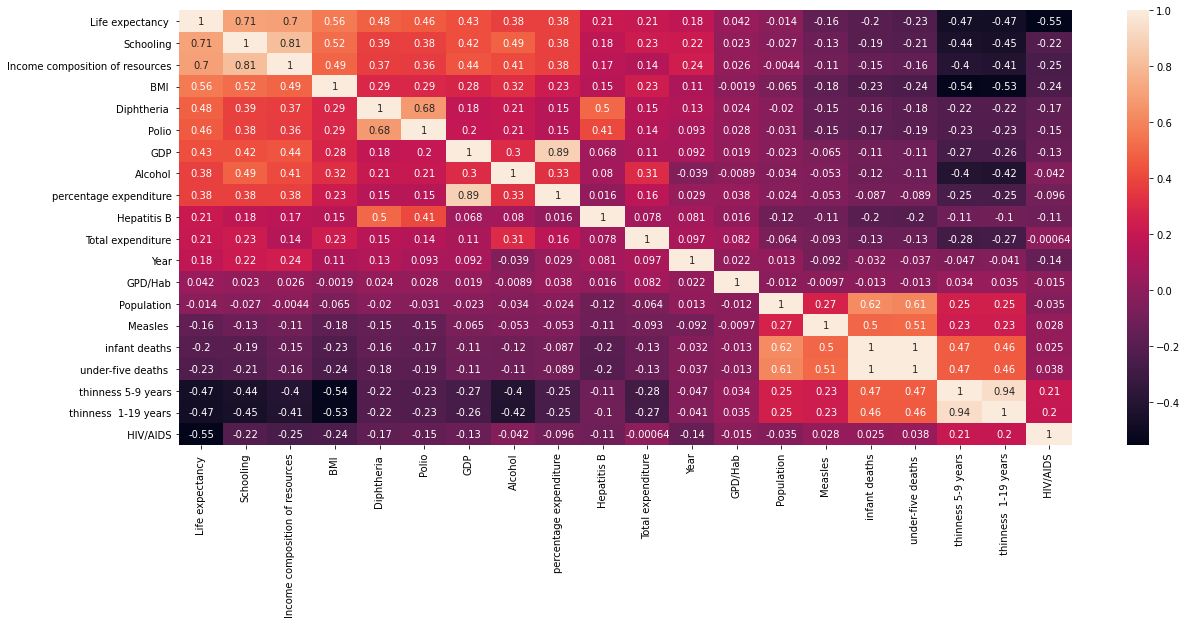

In [ ]:


def plot_corrMatrix(df,Nvariable,target):
  corr=df.corr()
  cols = corr.nlargest(Nvariable, target)[target].index
  cm = np.corrcoef(df[cols].values.T)
  sns.heatmap(cm,annot=True,yticklabels=cols.values,xticklabels=cols.values)
  

plt.figure(1, figsize=(20, 8))
plot_corrMatrix(train,20,'Life expectancy ')




In [ ]:
train.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# Features eegennering

train.loc[:,"GPD/Hab"] = train["GDP"] / train["Population"]
test.loc[:,"GPD/Hab"] = test["GDP"] / test["Population"]


train.loc[:,"disease"] = train["Hepatitis B"] * train[' HIV/AIDS'] * train["Diphtheria "] * train["Polio"]
test.loc[:,"disease"] = test["Hepatitis B"] * test[' HIV/AIDS'] * test["Diphtheria "] * test["Polio"]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [ ]:
def OneHotEncod(df,cols):
    for col in cols:
        dummy=pd.get_dummies(df[col],prefix=col) # dataFrame of dummies for each modality of the variable
        df=df.drop(col,axis=1) #drop the former variable
        df=pd.concat([df,dummy],axis=1) #put the dummies in the dataFrame
    return df

train = OneHotEncod(train,["Status"])
test = OneHotEncod(test,["Status"])


from sklearn.preprocessing import LabelEncoder

encod = LabelEncoder()

train.Country = encod.fit_transform(train.Country)
test.Country = encod.transform(test.Country)

# construire les modèles, prédire et évaluer 


In [ ]:
train.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'GPD/Hab', 'disease',
       'Status_Developed', 'Status_Developing'],
      dtype='object')

In [ ]:
y_train = train['Life expectancy ']
X_train = train.drop(['Life expectancy '], axis=1)

y_valid = test['Life expectancy ']
X_valid = test.drop(['Life expectancy '], axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error

def trainModels(X_train, y_train, X_valid,y_valid,models_list):
    
    score_list_train=[]
    score_list_valid=[]
    for model in models_list:
        model.fit(X_train,y_train)

        pred_train = model.predict(X_train)
        pred_valid = model.predict(X_valid)

        score_train = mean_squared_error(pred_train,y_train)
        score_valid = mean_squared_error(pred_valid,y_valid)

        score_list_train.append(score_train)
        score_list_valid.append(score_valid)

    df_score = {"Train":score_list_train, "Valdation": score_list_valid}
    df_score = pd.DataFrame(data = df_score)

    return df_score

In [ ]:
from sklearn.linear_model import Ridge,Lasso

ridge = Ridge(alpha = 0.5)
lasso = Lasso(alpha = 0.5)

list_m =[ridge,lasso]
score_1 = round(trainModels(X_train, y_train, X_valid,y_valid,list_m),2)
score_1 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.00056e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21505.210888710026, tolerance: 21.30399568915457
  positive)


,Train,Valdation
0,16.44,15.34
1,17.22,16.12


In [ ]:
from sklearn.ensemble  import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

Rforest = RandomForestRegressor(n_estimators = 50 , max_depth = 8)
AdaBoost = AdaBoostRegressor(n_estimators = 50)
GradientBoost = GradientBoostingRegressor(n_estimators = 50)


list_m =[Rforest,AdaBoost,GradientBoost]
score_2 = round(trainModels(X_train, y_train, X_valid,y_valid,list_m),2)
score_2


,Train,Valdation
0,1.98,5.24
1,8.91,10.83
2,4.67,6.23


In [ ]:
from sklearn.model_selection import GridSearchCV

def model_parameters_optimization(df,target,model,parameters_grid,score_type):
    
    grid_search=GridSearchCV(estimator=model,param_grid=parameters_grid,cv=5,n_jobs=-1,scoring=score_type)
    grid_search.fit(df,target)
    best_score=grid_search.best_score_
    best_parameter=grid_search.best_params_
    
    return best_score,best_parameter
    

In [ ]:
Rforest = RandomForestRegressor()
random_grid = {'max_depth': [10,20],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators':[50,100,200]}

score,params = model_parameters_optimization(X_train,y_train,Rforest,random_grid,'neg_mean_squared_error')
print(score,params)

-3.73097675173598 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_model = RandomForestRegressor(**params)

best_model.fit(X_train,y_train)
best_pred = best_model.predict(X_valid)
score_test = mean_squared_error(best_pred,y_valid)

print(score_test)

4.738863013384865


In [ ]:
df_pred = pd.DataFrame(data = best_pred, columns = ['y_pred'])
df_test = X_valid.reset_index()
df_ytest = pd.DataFrame(list(y_valid), columns = ['y_test'] ) # ligne modifiée
df = pd.concat([df_test, df_ytest, df_pred], axis=1)
df["error"] = np.abs((df["y_test"] - df["y_pred"]) / df["y_test"])
df.head()

print("poucentage d'erreur moyen :",df.error.mean())

poucentage d'erreur moyen : 0.019667757663927064


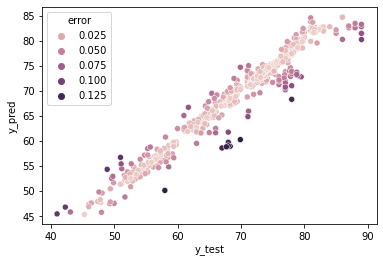

In [ ]:
sns.scatterplot(x = "y_test", y = "y_pred", hue= "error", data = df)




In [ ]:
big_error = df[df["error"]> 0.100]
big_error

,index,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,GPD/Hab,disease,Status_Developed,Status_Developing,y_test,y_pred,error
90,2476,154,2003,223.0,0,4.530000,32.366208,80.657328,0,49.700000,0,74.000000,6.620000,75.000000,1.0,263.139900,488332.0,3.500000,3.500000,0.000,10.9,0.000539,4.476482e+05,0,1,68.0,59.187,0.129603
113,2151,134,2008,282.0,18,6.390000,0.661540,97.000000,6,17.100000,28,97.000000,7.660000,97.000000,3.7,5.668726,978169.0,6.700000,6.600000,0.438,10.4,0.000006,3.376890e+06,0,1,68.0,59.771,0.121015
123,463,27,2000,155.0,0,3.490000,122.574470,80.657328,2,21.500000,0,9.000000,4.810000,9.000000,0.8,1239.377855,43579.0,9.600000,9.500000,0.000,11.3,0.028440,5.226595e+03,0,1,69.9,60.295,0.137411
131,2477,154,2002,221.0,0,4.410000,250.711237,80.657328,0,49.000000,0,74.000000,7.140000,73.000000,1.6,2232.513244,48344.0,3.500000,3.500000,0.000,11.0,0.046180,6.971374e+05,0,1,67.9,58.950,0.131811
193,2302,143,2001,519.0,30,4.210000,33.346915,80.657328,649,17.500000,48,38.000000,11.830000,38.000000,1.5,227.779471,4739147.0,1.100000,1.200000,0.302,7.0,0.000048,1.747038e+05,0,1,41.0,45.481,0.109293
200,2475,154,2004,214.0,0,4.550000,4.232577,80.657328,0,5.400000,0,84.000000,6.880000,85.000000,0.9,36.487730,49363.0,3.500000,3.500000,0.000,11.1,0.000739,5.183040e+05,0,1,68.3,58.962,0.136720
238,2912,182,2015,336.0,22,4.838764,0.000000,87.000000,0,31.800000,32,88.000000,5.990662,87.000000,6.2,118.693830,15777451.0,5.600000,5.500000,0.507,10.3,0.000008,4.129646e+06,0,1,67.0,58.635,0.124851
242,886,55,2009,274.0,169,1.170000,53.773540,56.000000,1176,15.300000,256,65.000000,4.410000,58.000000,2.0,379.756639,85416253.0,11.100000,1.800000,0.393,8.1,0.000004,4.222400e+05,0,1,68.0,59.069,0.131338
296,879,54,2000,218.0,0,0.010000,5.348095,80.657328,9,54.000000,0,93.000000,5.280000,93.000000,0.1,47.328270,1396985.0,2.500000,2.500000,0.764,14.4,0.000034,6.976052e+04,0,1,78.0,68.338,0.123872
335,2905,181,2006,526.0,33,2.250000,1.860004,81.000000,459,18.800000,52,83.000000,6.110000,81.000000,15.9,13.154199,12383446.0,7.000000,6.900000,0.479,10.9,0.000001,8.658552e+06,0,1,58.0,50.161,0.135155


In [ ]:
#!pip install shap

     |████████████████████████████████| 358kB 3.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491618 sha256=15082c209d87c5aeba3def8ca7adc5ce2cd2bc2f69bd44ba9d242419b7684431
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

def Compute_Shap(model,X):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X)
  return shap_values


def plot_oneShap(model,X,row_i):
  # explain the model's predictions using SHAP
  # (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(X)

  # visualize the i prediction's explanation (use matplotlib=True to avoid Javascript)
  shap.force_plot(explainer.expected_value, shap_values[row_i,:], X.iloc[row_i,:], matplotlib=True)

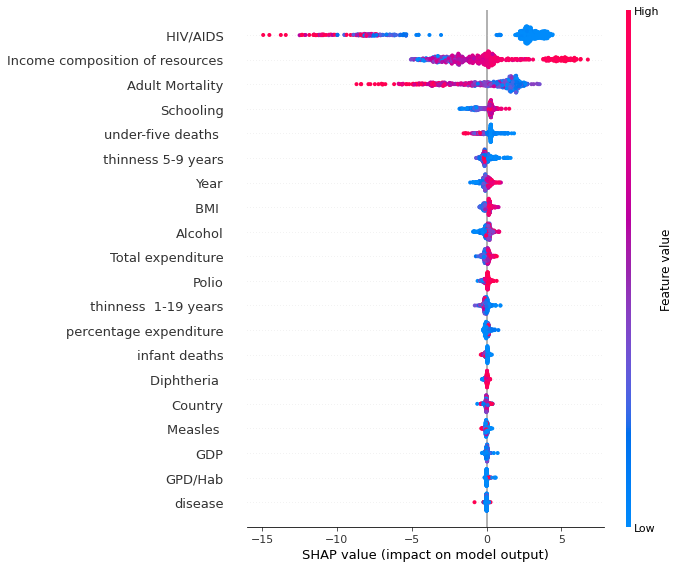

In [ ]:
shap_val = Compute_Shap(best_model,X_valid)
shap.summary_plot(shap_val, X_valid)

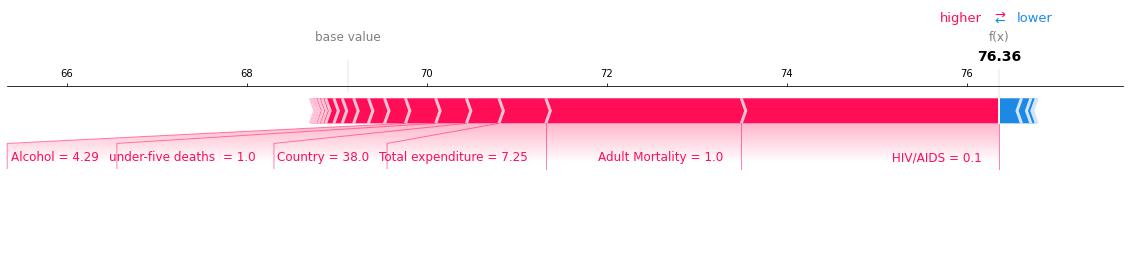

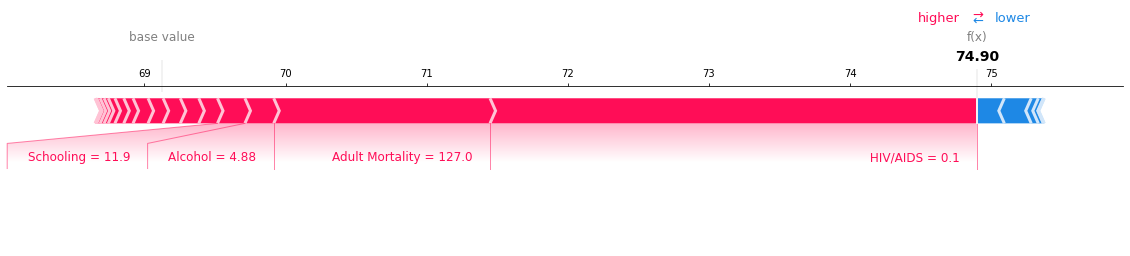

In [ ]:
plot_oneShap(best_model,X_valid,25)
plot_oneShap(best_model,X_valid,127)